# PCA方法
- 函数原型: sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)
- 官方文档: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA
- 相关说明: https://www.jianshu.com/p/8642d5ea5389

[[ 0.41724458  0.90879423]
 [-0.90879423  0.41724458]]

[[1.16076484 0.        ]]
[[-0.96095731 -0.32068398]]

[0.97468327 0.02531673]


Text(0.5, 1.0, 'Dimensionality Reduced')

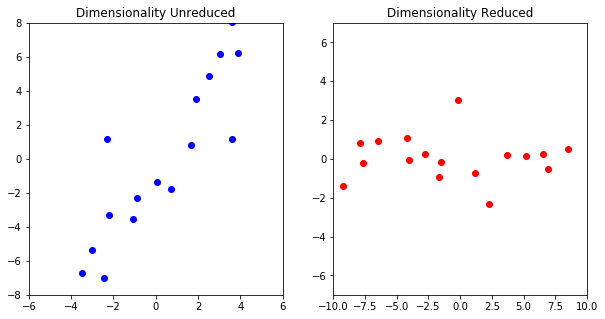

In [86]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.linspace(-5, 5, 20)
X = X.reshape((X.shape[0], 1))
X = np.concatenate((X, 2*X), axis=1)
X = X + np.random.normal(loc=0, scale=1, size=X.shape)


# 计算关联系数矩阵
# np.cov中的bias=False表示除以N-1而不是N
R = np.cov(X.T, bias=False)
# print(R)
eigenvalues, eigenvectors = np.linalg.eig(R)
order = eigenvalues.argsort()[::-1]
eigenvalues_order = eigenvalues[order]
eigenvectors = eigenvectors[order]
eigenvalues[1] = -eigenvalues[1]

# PCA训练器
pca = PCA(n_components=2, copy=True, whiten=False)
# 训练并降维
pca.fit(X)
x0 = [pca.components_[:, 0]]
newX = pca.transform(x0)

print(pca.components_)
print()
print(np.matmul(x0, pca.components_*eigenvalues))
print(newX)
# 将降维后数据逆变换回原数据
pca.inverse_transform(newX)
# 各个特征的方差百分比
print()
print(pca.explained_variance_ratio_)
#print(pca.explained_variance_ratio_) # 即特征值百分比
#print(pca.explained_variance_) # 即特征值

newX = pca.transform(X)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:, 1], color='b')
plt.xlim(xmin=-6, xmax=6)
plt.ylim(ymin=-8, ymax=8)
plt.title('Dimensionality Unreduced')
plt.subplot(1, 2, 2)
plt.scatter(newX[:,0], newX[:, 1], color='r')
plt.xlim(xmin=-10, xmax=10)
plt.ylim(ymin=-7, ymax=7)
plt.title('Dimensionality Reduced')